[[7.10629515]]
[-5240944.36154111]


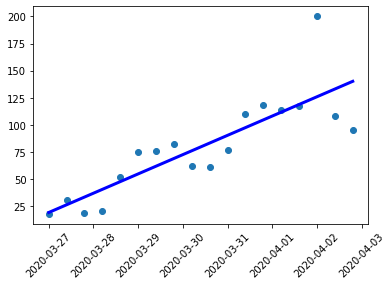

In [135]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltTest
import matplotlib.pyplot as pltSci
import datetime as dt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy as scipy


data = pd.read_csv("C:\\Users\\clark\\OneDrive\\Documents\\GitHub\\COVID-19\\sql\\SumByCountryStateDateAnalysis.csv", index_col=False)

mich = data[data.Province_State.eq('Michigan') & data.Last_Update.gt("2020-03-25") & data.Last_Update.lt("2020-04-13")]


michDates = mich['Last_Update']
mich['Last_Update'] = pd.to_datetime(mich['Last_Update'], format="%Y-%m-%d")
mich['Last_Update'] = mich['Last_Update'].map(dt.datetime.toordinal)
x = mich[["Last_Update"]] # .as_matrix()
y = mich[["DeathsDailyIncrease"]] # .as_matrix()

# x = x.reshape(length, 1)
# y = y.reshape(length, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression

print(linear_regressor.coef_)
print(linear_regressor.intercept_)

# y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.plot(x, linear_regressor.predict(x), color='blue', linewidth=3)

# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
ax.set_xticklabels(michDates, rotation=45)
 
plt.show() 

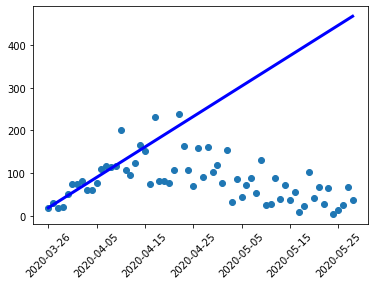

In [130]:
michTest = data[data.Province_State.eq('Michigan') & data.Last_Update.gt("2020-03-25") & data.Last_Update.lt("2020-05-30")]

michTestDates = michTest['Last_Update']
michTest['Last_Update'] = pd.to_datetime(michTest['Last_Update'], format="%Y-%m-%d")
michTest['Last_Update'] = michTest['Last_Update'].map(dt.datetime.toordinal)
xTest = michTest[["Last_Update"]] # .as_matrix()
yTest = michTest[["DeathsDailyIncrease"]] # .as_matrix()

pltTest.scatter(xTest, yTest)
pltTest.plot(xTest, linear_regressor.predict(xTest), color='blue', linewidth=3)

# get current axis
axTest = pltTest.gca()
# get current xtick labels
xticksTest = axTest.get_xticks()

xticksTest = np.asarray([dt.datetime.fromordinal(int(v)).isoformat()[0:10] for v in xticksTest], dtype=object)
# convert all xtick labels to selected format from ms timestamp
axTest.set_xticklabels(xticksTest, rotation=45)
 
pltTest.show() 

In [140]:
michSci = data[data.Province_State.eq('Michigan') & data.Last_Update.gt("2020-03-21") & data.Last_Update.lt("2020-04-13")]

michSciDates = michSci['Last_Update']
michSci['Last_Update'] = pd.to_datetime(michSci['Last_Update'], format="%Y-%m-%d")
michSci['Last_Update'] = michSci['Last_Update'].map(dt.datetime.toordinal)
xSci = michSci[["Last_Update"]] # .as_matrix()
ySci = michSci[["DeathsDailyIncrease"]] # .as_matrix()

def ff(t,a,b):
    a+b*np.log(t)
    # a*np.exp(b*x)

sci = scipy.optimize.curve_fit(ff, xSci['Last_Update'], ySci["DeathsDailyIncrease"])

pltTest.scatter(xTest, yTest)
pltTest.plot(xTest, linear_regressor.predict(xTest), color='blue', linewidth=3)

# get current axis
axTest = pltTest.gca()
# get current xtick labels
xticksTest = axTest.get_xticks()

xticksTest = np.asarray([dt.datetime.fromordinal(int(v)).isoformat()[0:10] for v in xticksTest], dtype=object)
# convert all xtick labels to selected format from ms timestamp
axTest.set_xticklabels(xticksTest, rotation=45)
 
pltTest.show() 

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'